In [1]:
import torch
from torch import nn, functional as F
import numpy as np
from matplotlib import pyplot as plt
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader, TensorDataset

import matplotlib.colors as colors

import warnings
warnings.filterwarnings('ignore')

from utils import test_plot_and_save
from customClasses import LinearNet, LinearHettingerInit, CReLU
from datahandler import constructLoader

In [2]:
# # initialize train and testloaders
# # set options and train
# ds_name = 'cos'
# #ds_name = 'check'
# datasetLength = 100
# test_size = .33

# if ds_name == 'cos':
#     loss = 'mean_squared_error'
#     lossf = nn.MSELoss()
#     outf = None

# elif ds_name == 'check':
#     lossf = nn.CrossEntropyLoss()
#     outf = nn.Sigmoid()

# trainloader, testloader = constructLoader(ds_name, m=datasetLength, test_size=test_size, random_state=42, train_batch_size=128, test_batch_size=32)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/diabetes.csv')

Xcolumns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in Xcolumns:
    df[col] = (df[col] - df[col].mean())/df[col].std()
       
X_train, X_test, y_train, y_test = train_test_split(df[Xcolumns].values, df['Outcome'].values, test_size=0.33, random_state=42)

trainData = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train))
testData = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test))

train_batch_size = 128
test_batch_size = 256

trainloader = DataLoader(
        dataset=trainData,
        batch_size=train_batch_size,
        shuffle=True,
        pin_memory=False)
testloader = DataLoader(
        dataset=testData,
        batch_size=test_batch_size,
        shuffle=True,
        pin_memory=False)

________________________________________________________________________________ 
Linear H-init with CReLU:
Previous run found. Outputting previous results.


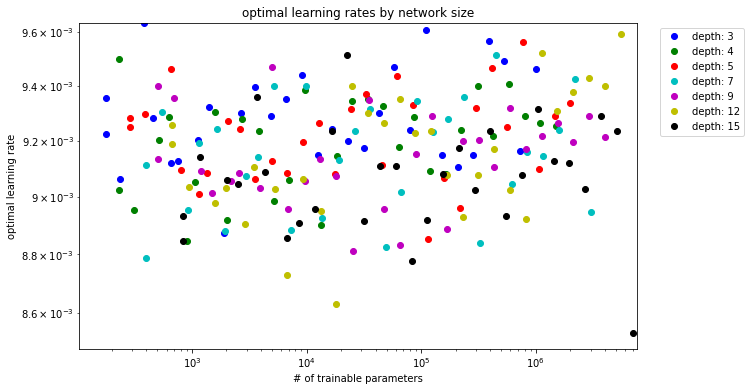

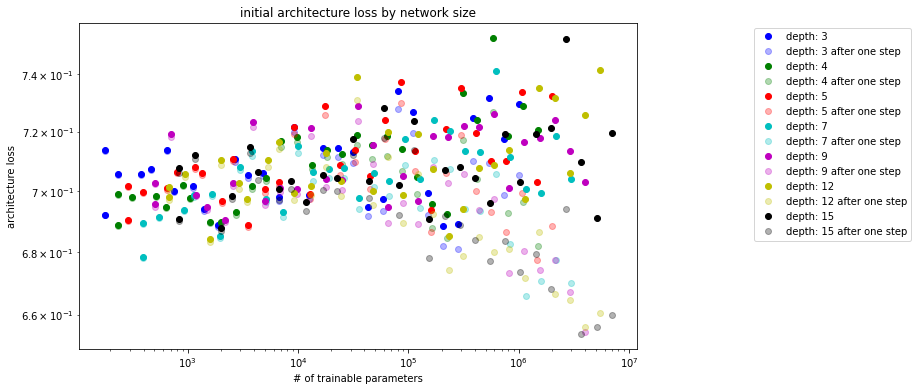



________________________________________________________________________________ 
Linear H-init with ReLU:
Previous run found. Outputting previous results.


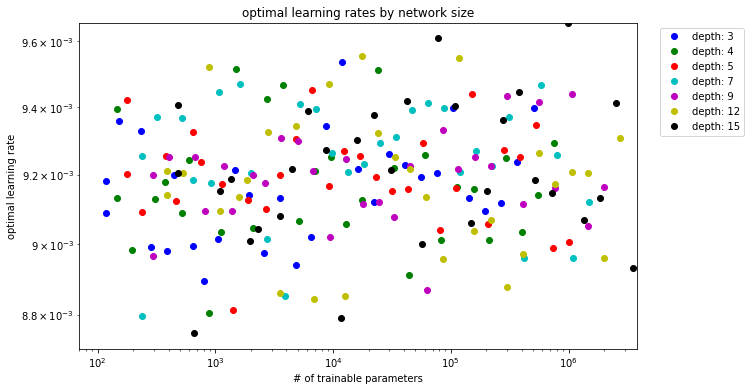

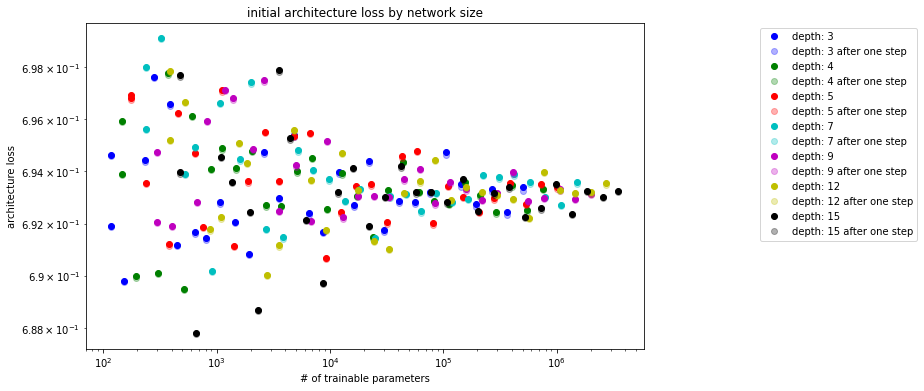

________________________________________________________________________________ 
Linear H-init (fixed) with CReLU:
Previous run found. Outputting previous results.


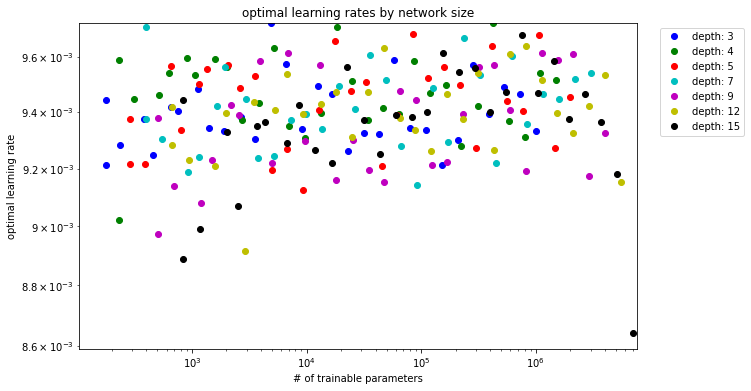

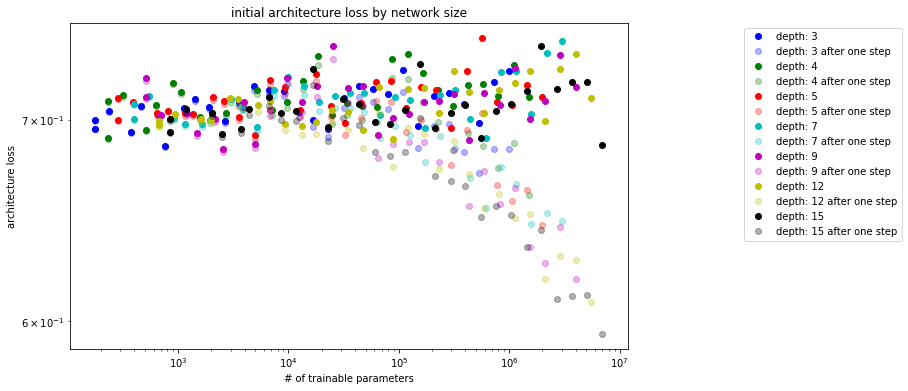



________________________________________________________________________________ 
Linear H-init (fixed) with ReLU:
Previous run found. Outputting previous results.


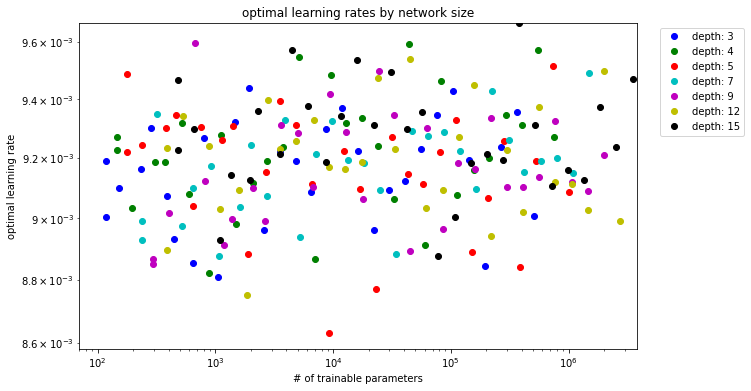

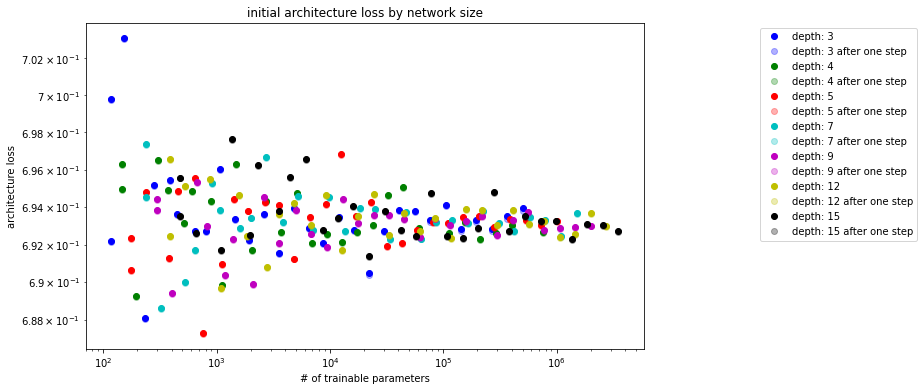



________________________________________________________________________________ 
Linear with CReLU:
Previous run found. Outputting previous results.


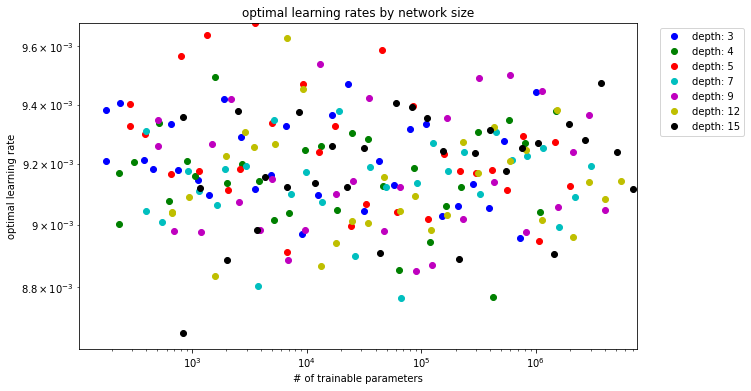

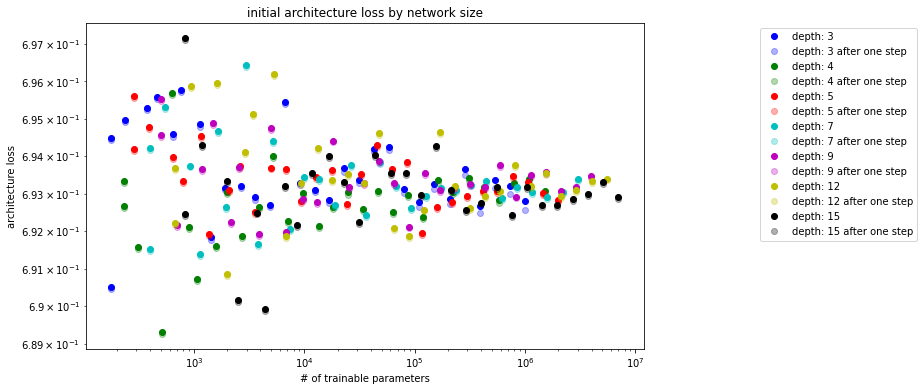



________________________________________________________________________________ 
Linear with ReLU:
Previous run found. Outputting previous results.


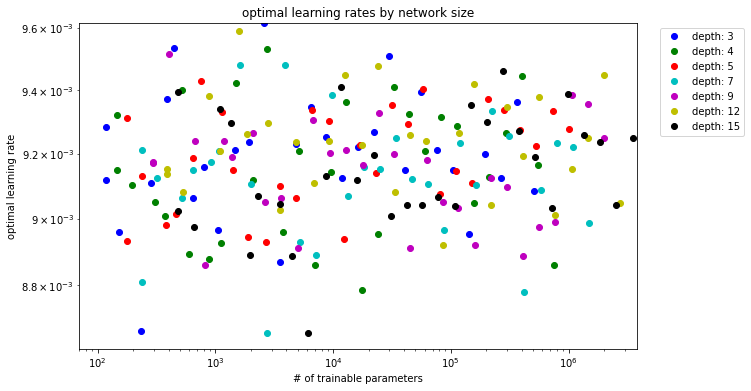

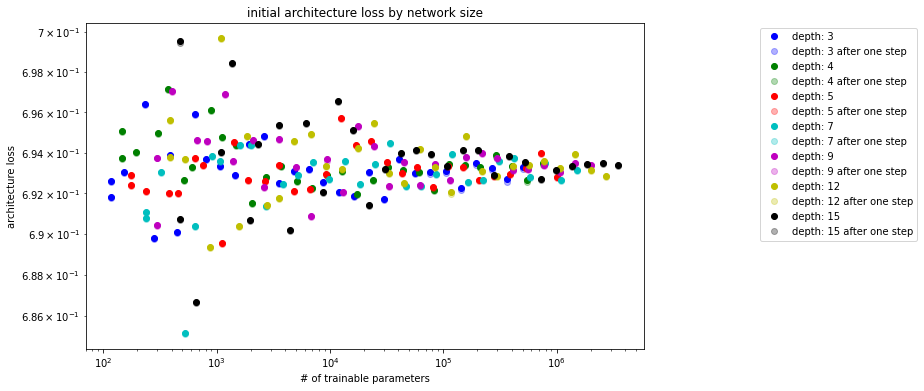

In [4]:
# large tests
minwidth, maxwidth, nwidths = 5, 500, 30
depths = [3, 4, 5, 7, 9, 12, 15]
plotvswidth, plot_errors = False, False
trials_per_architecture = 20
max_lr_to_plot = 1
lr_bounds = (.01, 1e-6)
lr_npoints = 180
ymin, ymax = None, None
optimizer_class = SGD
root = './models/'
repeat_if_file_exists = False
filename_prefix = 'large1'
filename_prefix_retest = 'large1_fixedHinit'
inDim = 8
outf = None
outDim = 2

lossf = nn.CrossEntropyLoss()
outf = nn.Sigmoid()


print('_'*80,
     '\nLinear H-init with CReLU:')

var_dict = test_plot_and_save(LinearNet, LinearHettingerInit, CReLU, filename_prefix + 'TestLinearHCReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

print('\n\n'+'_'*80,
     '\nLinear H-init with ReLU:')

var_dict = test_plot_and_save(LinearNet, LinearHettingerInit, nn.ReLU, filename_prefix + 'TestLinearHReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

print('_'*80,
     '\nLinear H-init (fixed) with CReLU:')

var_dict = test_plot_and_save(LinearNet, LinearHettingerInit, CReLU, filename_prefix_retest + 'TestLinearHCReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

print('\n\n'+'_'*80,
     '\nLinear H-init (fixed) with ReLU:')

var_dict = test_plot_and_save(LinearNet, LinearHettingerInit, nn.ReLU, filename_prefix_retest + 'TestLinearHReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

print('\n\n'+'_'*80,
     '\nLinear with CReLU:')

var_dict = test_plot_and_save(LinearNet, nn.Linear, CReLU, filename_prefix + 'TestLinearCReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

print('\n\n'+'_'*80,
     '\nLinear with ReLU:')

var_dict = test_plot_and_save(LinearNet, nn.Linear, nn.ReLU, filename_prefix + 'TestLinearReLUDiabetes', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

In [ ]:
print('finished')

## New Scaling Factor Test

In [7]:
def Sn(dims):
    """
    Input - list of di [d0, d1, d2, ..., dn]
        where d0 is the length of the input,
        d1 is the number of rows in the first layer,
        and dn is the number of rows in the last layer (the output length).
    Output - the proposed scaled factor
    """
    numer = sum(dims)
    denom = 0
    for i in range(1,len(dims)):
        denom += np.sqrt(dims[i]*dims[i-1])
        for j in range(i+1,len(dims)):
            numer += np.sqrt(dims[i]*dims[j]*dims[j-1]/dims[i-1])
    numer = 4*numer/(dims[0]*dims[-1])
    denom = denom/np.sqrt(dims[0]*dims[-1])
    return numer/denom

________________________________________________________________________________ 
Linear H-init with CReLU:
Previous run found. Outputting previous results.


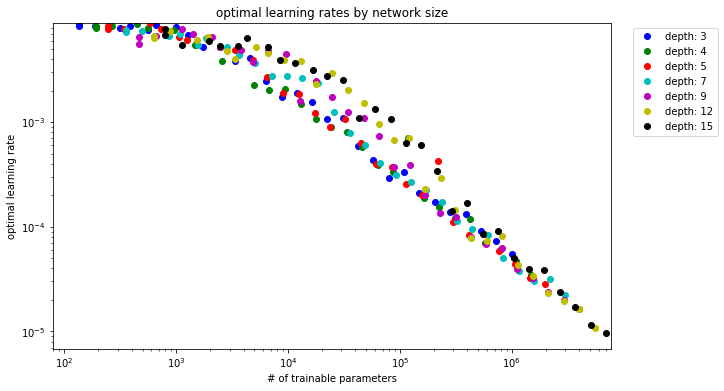

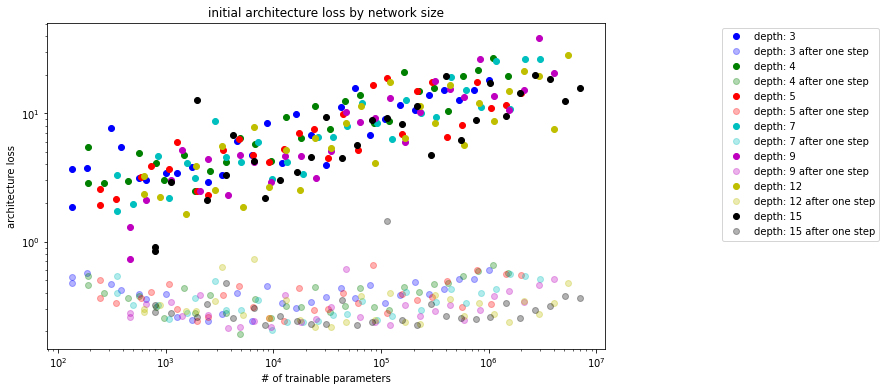

In [5]:
# large tests
minwidth, maxwidth, nwidths = 5, 500, 30
depths = [3, 4, 5, 7, 9, 12, 15]
plotvswidth, plot_errors = False, False
trials_per_architecture = 20
max_lr_to_plot = 1
lr_bounds = (.01, 1e-6)
lr_npoints = 180
ymin, ymax = None, None
optimizer_class = SGD
root = './models/'
repeat_if_file_exists = False
filename_prefix = 'large1'
outf = None
outDim = 1


print('_'*80,
     '\nLinear H-init with CReLU:')

var_dict = test_plot_and_save(LinearNet, LinearHettingerInit, CReLU, filename_prefix + 'TestLinearHCReLUCosine', root=root,
                              lossf=lossf, optimizer_class=optimizer_class,
                              trainloader=trainloader, testloader=testloader,
                              minwidth=minwidth, maxwidth=maxwidth, nwidths=nwidths, depths=depths, 
                              plotvswidth=plotvswidth, plot_errors=plot_errors,
                              max_lr_to_plot=max_lr_to_plot, ymin=ymin, ymax=ymax,
                              repeat_if_file_exists=repeat_if_file_exists,
                              trials_per_architecture=trials_per_architecture,
                              lr_bounds=lr_bounds, lr_npoints=lr_npoints,
                              outf=outf, outDim=outDim)

In [31]:
optimal_lrs = var_dict['optimal_lrs']
scaling_factors = np.zeros_like(optimal_lrs)

minwidth, maxwidth, nwidths = 5, 500, 30
widths = np.logspace(np.log10(minwidth), np.log10(maxwidth), nwidths, dtype=np.int64)
depths = [3, 4, 5, 7, 9, 12, 15]

inDim = 1
outDim = 1


for j, depth in enumerate(depths):
    for i, width in enumerate(widths):
        dims = [inDim] + [width]*depth + [outDim]
        scaling_factors[i, j] = Sn(dims)

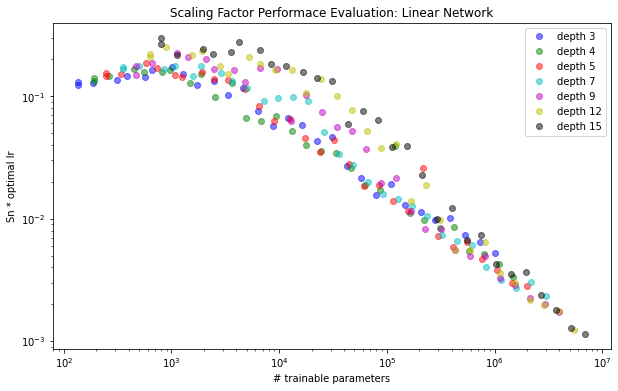

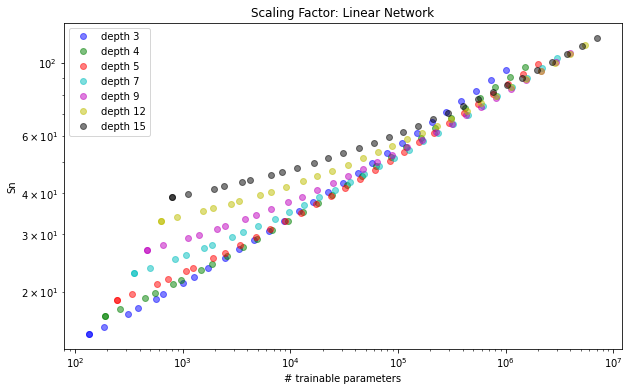

In [32]:
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))

for j, depth in enumerate(depths):
    plt.loglog(var_dict['trainable_params'][:, j], optimal_lrs[:, j]*scaling_factors[:, j], 'o', alpha=.5, color=colors[j], label=f'depth {depth}')
    
plt.title('Scaling Factor Performace Evaluation: Linear Network')
plt.xlabel('# trainable parameters')
plt.ylabel('Sn * optimal lr')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

for j, depth in enumerate(depths):
    plt.loglog(var_dict['trainable_params'][:, j], scaling_factors[:, j], 'o', alpha=.5, color=colors[j], label=f'depth {depth}')
    
plt.title('Scaling Factor: Linear Network')
plt.xlabel('# trainable parameters')
plt.ylabel('Sn')
plt.legend()
plt.show()

In [12]:
var_dict.keys()

dict_keys(['optimal_lrs', 'variances', 'mean_initial_losses', 'mean_final_losses', 'trainable_params'])

In [34]:
!ls './models/' 

large1TestLinearCReLUCosine   large1TestLinearReLUCosine
large1TestLinearHCReLUCosine  small1TestResNetMNIST
large1TestLinearHReLUCosine
